In [70]:
import kagglehub
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [3]:
#Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/NY-House-Dataset.csv")
df.head()


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
df.info()
# target variable is price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## EDA

In [5]:
df.head(5)
# remove columns [BrokerTitle, Address, State, Main_address, 
# Adnubustrative_area_level_2, Street_name, Logname, Formatted_address, latitute, longitude]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


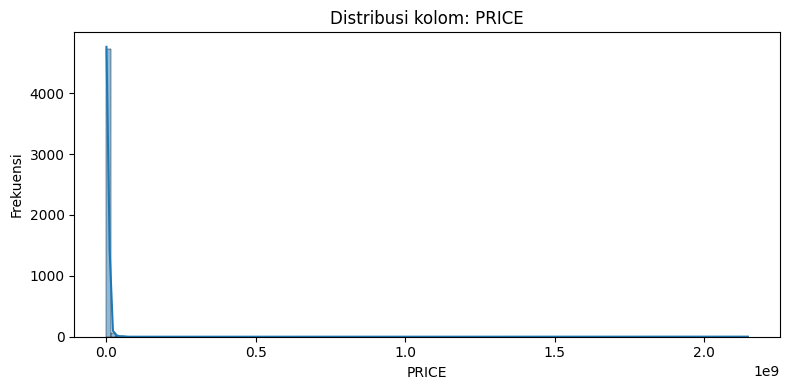

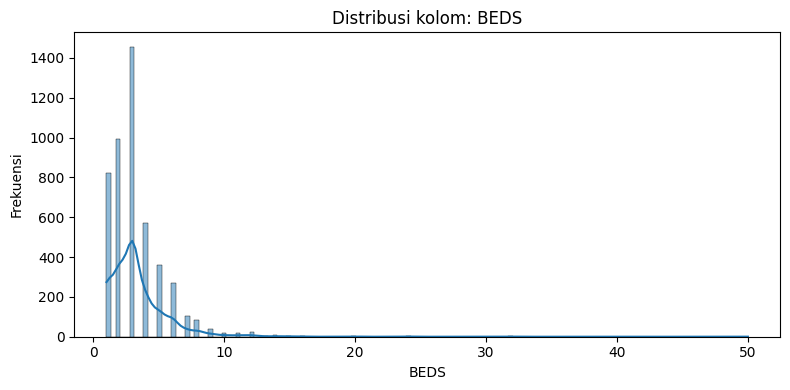

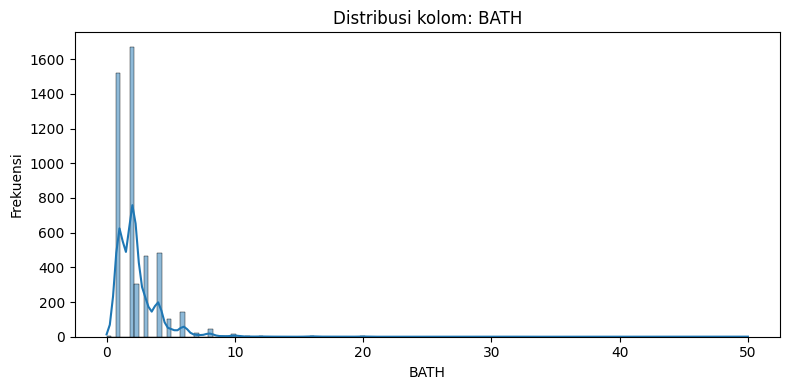

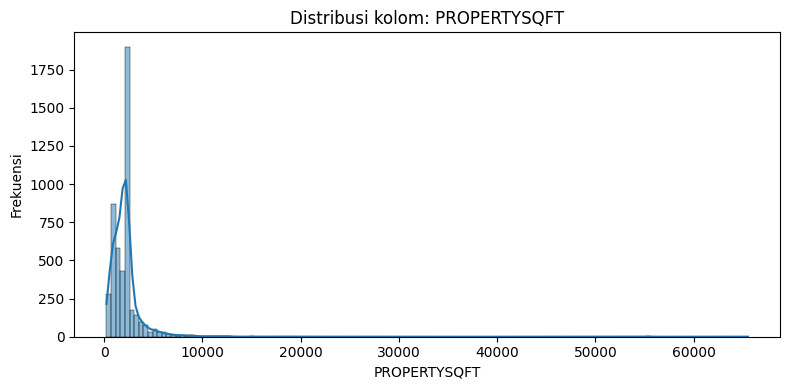

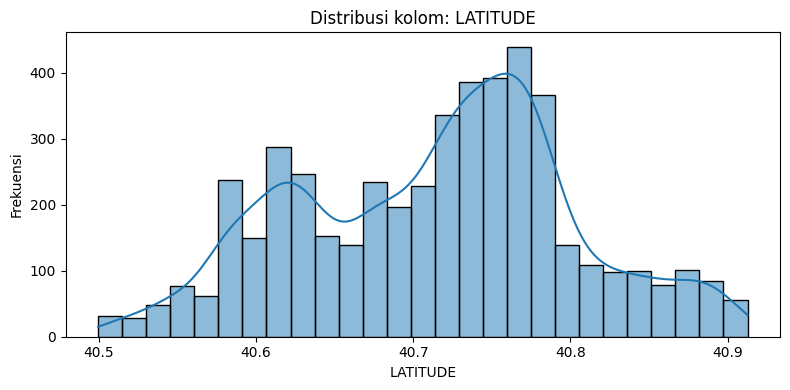

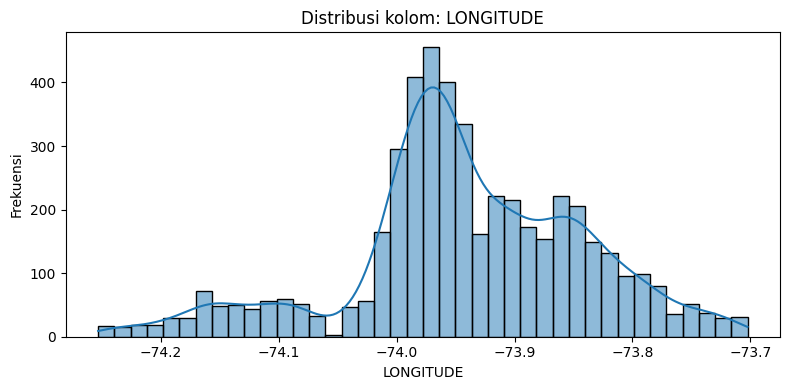

In [6]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [7]:
df['PRICE'].sort_values(ascending=True).head(10)
# 304, 1, 317, 310, 360 463 outliers

317      2494
310      3225
360      5800
463     49500
979     60000
188     65000
3       69000
252     69000
132     69900
4003    75000
Name: PRICE, dtype: int64

In [8]:
df['BEDS'].sort_values(ascending=False).head(10)
# remove outlier beds [1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404]

1143    50
2653    42
3276    40
2488    36
765     35
2265    32
3589    32
3603    30
1092    24
4240    24
Name: BEDS, dtype: int64

In [9]:
df['PROPERTYSQFT'].sort_values(ascending=False)
#drop values outlier [4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171]

4623    65535.0
2146    55300.0
2148    55300.0
823     48000.0
7       33000.0
         ...   
1494      260.0
332       250.0
2166      250.0
4693      246.0
188       230.0
Name: PROPERTYSQFT, Length: 4801, dtype: float64

In [10]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

## Feature Engineering

In [11]:
# drop value 
df.drop([304, 1, 317, 310, 360, 463], inplace=True)  # PRICE outliers
df.drop([1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404], inplace=True)  # BEDS outliers
df.drop([4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171], inplace=True)  # PROPERTYSQFT outliers

In [12]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [13]:
# drop columns 
df.drop(['TYPE','STATE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS','LONGITUDE', 'LATITUDE','BROKERTITLE','SUBLOCALITY'], axis=1, inplace=True)
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY
0,315000,2,2.0,1400.000000,New York
2,260000,4,2.0,2015.000000,New York
3,69000,3,1.0,445.000000,New York
5,690000,5,2.0,4004.000000,New York
6,899500,2,2.0,2184.207862,New York County


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764 entries, 0 to 4800
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4764 non-null   int64  
 1   BEDS          4764 non-null   int64  
 2   BATH          4764 non-null   float64
 3   PROPERTYSQFT  4764 non-null   float64
 4   LOCALITY      4764 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 223.3+ KB


In [15]:
df['BATH'] = df['BATH'].astype(int)
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype(int)

In [16]:
df.head(50)

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY
0,315000,2,2,1400,New York
2,260000,4,2,2015,New York
3,69000,3,1,445,New York
5,690000,5,2,4004,New York
6,899500,2,2,2184,New York County
7,16800000,8,16,33000,New York
8,265000,1,1,750,The Bronx
9,440000,2,1,978,Kings County
10,375000,2,1,850,Bronx County
11,689000,3,2,1162,New York


In [17]:
df = df[df['PRICE'] < 1e7]
price_cap = df['PRICE'].quantile(0.95)
df = df[df['PRICE']<= price_cap]

<Axes: xlabel='PRICE', ylabel='Count'>

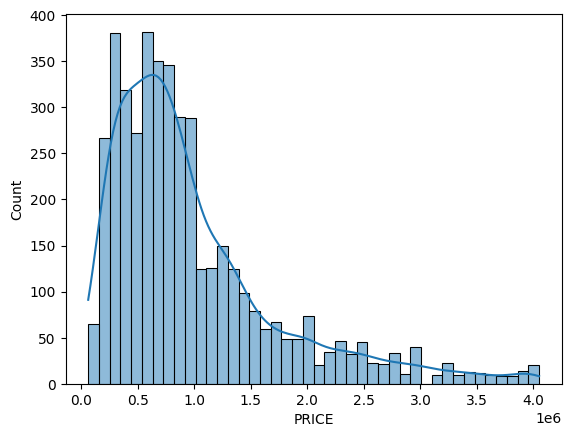

In [18]:
sns.histplot(df['PRICE'], kde=True)

In [19]:
df['PRICE_PER_BATH'] = df['PRICE'] // df['BATH'].replace(0,1)

In [20]:
df['SQFT_PER_BATH'] = df['PROPERTYSQFT'] // df['BATH'].replace(0,1)

In [21]:
df['IS_LUXURY'] = (df['PRICE'] > 2000000).astype(int) 
# 

In [22]:
luxury_home= df[df['PRICE'] > 2000000]
# tipe rumah kaya memiliki apa saja?

In [23]:
luxury_home.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,PRICE_PER_BATH,SQFT_PER_BATH,IS_LUXURY
count,4.370000e+02,437.000000,437.000000,437.000000,4.370000e+02,437.000000,437.0
mean,2.806195e+06,4.308924,3.432494,2899.070938,1.019138e+06,952.194508,1.0
std,5.641776e+05,2.525691,2.250004,1694.160109,4.560220e+05,588.406662,0.0
min,2.025000e+06,1.000000,1.000000,750.000000,9.375000e+04,218.000000,1.0
25%,2.348000e+06,3.000000,2.000000,1927.000000,6.247500e+05,641.000000,1.0
50%,2.695000e+06,3.000000,3.000000,2184.000000,1.049500e+06,848.000000,1.0
75%,3.200000e+06,5.000000,4.000000,3446.000000,1.300000e+06,1092.000000,1.0
max,4.050000e+06,16.000000,32.000000,12200.000000,2.800000e+06,6862.000000,1.0


In [24]:
df.head(10)

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,PRICE_PER_BATH,SQFT_PER_BATH,IS_LUXURY
0,315000,2,2,1400,New York,157500,700,0
2,260000,4,2,2015,New York,130000,1007,0
3,69000,3,1,445,New York,69000,445,0
5,690000,5,2,4004,New York,345000,2002,0
6,899500,2,2,2184,New York County,449750,1092,0
8,265000,1,1,750,The Bronx,265000,750,0
9,440000,2,1,978,Kings County,440000,978,0
10,375000,2,1,850,Bronx County,375000,850,0
11,689000,3,2,1162,New York,344500,581,0
12,259000,3,1,2184,Queens County,259000,2184,0


In [25]:
df.duplicated().sum()

np.int64(426)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,PRICE_PER_BATH,SQFT_PER_BATH,IS_LUXURY
0,315000,2,2,1400,New York,157500,700,0
2,260000,4,2,2015,New York,130000,1007,0
3,69000,3,1,445,New York,69000,445,0
5,690000,5,2,4004,New York,345000,2002,0
6,899500,2,2,2184,New York County,449750,1092,0
...,...,...,...,...,...,...,...,...
4795,2999999,15,9,3600,New York,333333,400,1
4797,245000,1,1,2184,New York,245000,2184,0
4798,1275000,1,1,2184,New York,1275000,2184,0
4799,598125,2,1,655,Queens County,598125,655,0


## Dataset Preparation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [46]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()


In [48]:
one_hot = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot.fit(X_train[categorical_columns])

X_train_cat = one_hot.transform(X_train[categorical_columns])
X_test_cat = one_hot.transform(X_test[categorical_columns])

encoded_categorical_columns = one_hot.get_feature_names_out(categorical_columns)

X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_categorical_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_categorical_columns, index=X_test.index)

X_train_num_df = X_train[numerical_columns].reset_index(drop=True)
X_test_num_df = X_test[numerical_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_num_df, X_train_cat_df.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df.reset_index(drop=True)],axis=1)
X_train_final.head()

,BEDS,BATH,PROPERTYSQFT,PRICE_PER_BATH,SQFT_PER_BATH,IS_LUXURY,LOCALITY_Bronx County,LOCALITY_Brooklyn,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,LOCALITY_Richmond County,LOCALITY_The Bronx,LOCALITY_United States
0,3,2,1660,574500,830,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,506,480000,506,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,3,3327,250000,1109,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,2184,1395000,2184,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,692,625000,692,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_train_final.columns 
# colom yang tidak penting harus dibuang seperti ZIP

Index(['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE_PER_BATH', 'SQFT_PER_BATH',
       'IS_LUXURY', 'LOCALITY_Bronx County', 'LOCALITY_Brooklyn',
       'LOCALITY_Kings County', 'LOCALITY_New York',
       'LOCALITY_New York County', 'LOCALITY_Queens', 'LOCALITY_Queens County',
       'LOCALITY_Richmond County', 'LOCALITY_The Bronx',
       'LOCALITY_United States'],
      dtype='object')

<Axes: >

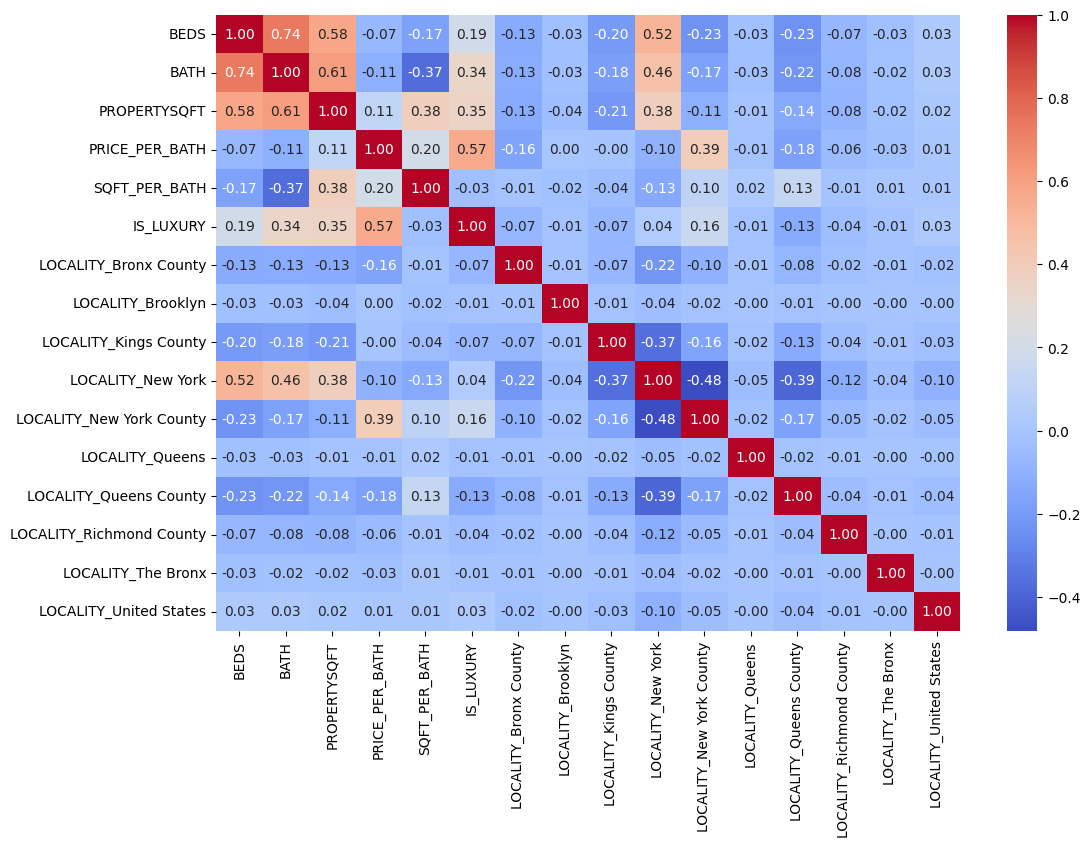

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')

## Model Building and Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import pickle

In [71]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('predict_house_price_new_york')
def evaluate_model(y_true,y_pred,):
    return {
        'MAE' : mean_absolute_error(y_true, y_pred),
        'RMSE' : mean_squared_error(y_true,y_pred),
        'R2_Score' : r2_score(y_true,y_pred)
    }
    
    

In [ ]:
models = {
    'XGB_Regressor': {
        'model' : XGBRegressor(),
        'params' : {
            'n_estinamtor' : 300,
            'max_dept'  : 6,
            'learning_rate' : 0.1, 
            'random_state' : 42
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : 200,
            'max_depth' : 10,
            'random_state' : 42
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'n_estimators' : 200,
            'learning_rate' : 0.1,
            'max_depth' : 6,
            'random_state' : 42
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'max_depth' : 10,
            'random_state' : 42
        }
    }
}

In [89]:
for model_name, model_info in models.items():
    with mlflow.start_run(run_name=model_name):
        # log model parameters
        mlflow.log_params(model_info['params'])
        
        # train model
        model = model_info['model'].set_params(**model_info['params'])
        model.fit(X_train_final, y_train)
        
        #make predictions
        y_pred= model.predict(X_test_final)
        
        # save model local
        with open(f'{model_name}_model.pkl', 'wb') as f:
            pickle.dump(model, f)
        
        #calculate metrics
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        
        # log model
        mlflow.sklearn.log_model(model,model_name,registered_model_name=f"{model_name}_model")
        
        print(f"\nModel: {model_name}")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")    
        

2025/10/28 12:15:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:15:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGB_Regressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'XGB_Regressor_model'.



Model: XGB_Regressor
MAE: 13080.5137
RMSE: 892839232.0000
R2_Score: 0.9984


2025/10/28 12:15:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:15:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'Random_Forest_Regressor_model'.



Model: Random_Forest_Regressor
MAE: 9183.7707
RMSE: 1380345769.5467
R2_Score: 0.9975


2025/10/28 12:16:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:16:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'Gradient_Boosting_Regressor_model'.



Model: Gradient_Boosting_Regressor
MAE: 7408.8128
RMSE: 497743486.1688
R2_Score: 0.9991


2025/10/28 12:16:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:16:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Decision_Tree_Regressor_model' already exists. Creating a new version of this model...
Created version '2' of model 'Decision_Tree_Regressor_model'.



Model: Decision_Tree_Regressor
MAE: 11379.4429
RMSE: 1669316550.1764
R2_Score: 0.9970


## With Hyperamater Tuning

In [90]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('predict_house_price_new_york_v2')

<Experiment: artifact_location='file:///d:/Python/dibimbing/assigment_day_41/research/mlruns/2', creation_time=1761626179572, experiment_id='2', last_update_time=1761626179572, lifecycle_stage='active', name='predict_house_price_new_york_v2', tags={}>

In [91]:
models_hyperTuning = {
    'XGB_Regressor': {
        'model' : XGBRegressor(random_state=42),
        'params' : {
            'n_estinamtor' : [200,300,400],
            'max_dept'  : [4,6,8],
            'learning_rate' : [0.05 ,0.1], 
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(random_state=42),
        'params' : {
            'n_estimators' : [100,200,300],
            'max_depth' : [8,10,12],
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(random_state=42),
        'params' : {
            'n_estimators' : [100,200,300],
            'learning_rate' : [0.05,0.1],
            'max_depth' : [4,6,8],
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(random_state=42),
        'params' : {
            'max_depth' : [8,10,12,15],
        }
    }
}

In [92]:
# grid search hyperparameter tuning
for model_name, model_info in models_hyperTuning.items():
    with mlflow.start_run(run_name=f"{model_name}_Hyperparameter_Tuning") :
        
        
        grid_search= model_info['model'] 
        grid_search = GridSearchCV(estimator=model_info['model'],
                                param_grid=model_info['params'],
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1,
                                verbose=1)
        grid_search.fit(X_train_final, y_train)
        
        best_model = grid_search.best_estimator_
        
        mlflow.log_params(best_model.get_params())
        
        y_pred = best_model.predict(X_test_final)
        
        #save model pkl
        with open(f'{model_name}_best_model.pkl', 'wb') as f:
            pickle.dump(best_model, f)
        
        
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        #save log model
        mlflow.sklearn.log_model(best_model,model_name,registered_model_name=f"{model_name}_best_model")
        
        print(f"\nModel: {model_name} after Hyperparameter Tuning")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


2025/10/28 12:27:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:27:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGB_Regressor_best_model' already exists. Creating a new version of this model...
Created version '4' of model 'XGB_Regressor_best_model'.



Model: XGB_Regressor after Hyperparameter Tuning
MAE: 13080.5137
RMSE: 892839232.0000
R2_Score: 0.9984
Fitting 5 folds for each of 9 candidates, totalling 45 fits


2025/10/28 12:28:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:28:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_best_model' already exists. Creating a new version of this model...
Created version '4' of model 'Random_Forest_Regressor_best_model'.



Model: Random_Forest_Regressor after Hyperparameter Tuning
MAE: 8024.5870
RMSE: 1317520147.0414
R2_Score: 0.9976
Fitting 5 folds for each of 18 candidates, totalling 90 fits


2025/10/28 12:28:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:28:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_best_model' already exists. Creating a new version of this model...
Created version '4' of model 'Gradient_Boosting_Regressor_best_model'.



Model: Gradient_Boosting_Regressor after Hyperparameter Tuning
MAE: 7824.9885
RMSE: 517835120.4582
R2_Score: 0.9991
Fitting 5 folds for each of 4 candidates, totalling 20 fits


2025/10/28 12:28:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/28 12:28:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Decision_Tree_Regressor_best_model' already exists. Creating a new version of this model...
Created version '4' of model 'Decision_Tree_Regressor_best_model'.



Model: Decision_Tree_Regressor after Hyperparameter Tuning
MAE: 6921.0229
RMSE: 1147431215.1238
R2_Score: 0.9979


In [81]:
from mlflow.tracking import MlflowClient

def load_production_model(model_name):
    model = mlflow.sklearn.load_model(f"models:/{model_name}/Production")
    return model

client = MlflowClient()

def trasition_model_to_production(model_name):
    client =  MlflowClient()
    latest_version = client.get_latest_versions(f"{model_name}_best_model",stages=['None'])[0]
    client.transition_model_version_stage(
        name=f"{model_name}_best_model",
        version = latest_version.version,
        stage = 'Production'
    )

In [82]:
trasition_model_to_production('Decision_Tree_Regressor')

In [83]:
def get_all_runs():
    experiment = mlflow.get_experiment_by_name('predict_house_price_new_york')
    runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
    return runs

In [85]:
runs_df = get_all_runs()
metrics_comparison = runs_df[['tags.mlflow.runName','metrics.MAE','metrics.RMSE','metrics.R2_Score']]
print("\nModel Performance Comparison:")
print(metrics_comparison) 


Model Performance Comparison:
                                  tags.mlflow.runName   metrics.MAE  \
0       Decision_Tree_Regressor_Hyperparameter_Tuning   6921.022919   
1   Gradient_Boosting_Regressor_Hyperparameter_Tuning   7824.988531   
2       Random_Forest_Regressor_Hyperparameter_Tuning   8024.587015   
3                 XGB_Regressor_Hyperparameter_Tuning  13080.513672   
4       Decision_Tree_Regressor_Hyperparameter_Tuning   6921.022919   
5   Gradient_Boosting_Regressor_Hyperparameter_Tuning   7824.988531   
6       Random_Forest_Regressor_Hyperparameter_Tuning   8024.587015   
7                 XGB_Regressor_Hyperparameter_Tuning  13080.513672   
8                             Decision_Tree_Regressor  11379.442948   
9                         Gradient_Boosting_Regressor   7408.812842   
10                            Random_Forest_Regressor   9183.770681   
11                                      XGB_Regressor  13080.513672   
12                                      XGB_Re